# K-Nearest Neighbours

##### More here: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

KNN can be used for classification and regressions, although it is mostly used for classification. It works by using the most similar examples to new data.

KNN works by holding the whole dataset. When a new instance is seen, KNN will find the nearest neighbours of that new instance and assign the instance to that neighbourhood. Hence, no work is done until a prediction has to be made.

The steps are as follows:
1. Calculate the Euclidean distance
2. Get the nearest neighbours
3. Make predictions!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns
from sklearn import datasets

We will use the iris dataset to learn KNN

In [2]:
# import some data to play with
iris = datasets.load_iris()
x = iris.data
y = iris.target

iris_df = pd.DataFrame(x, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = y

x_y = np.hstack((x, y.reshape(len(y), 1)))

print(x.shape, y.shape)
display(iris_df.head())

(150, 4) (150,)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


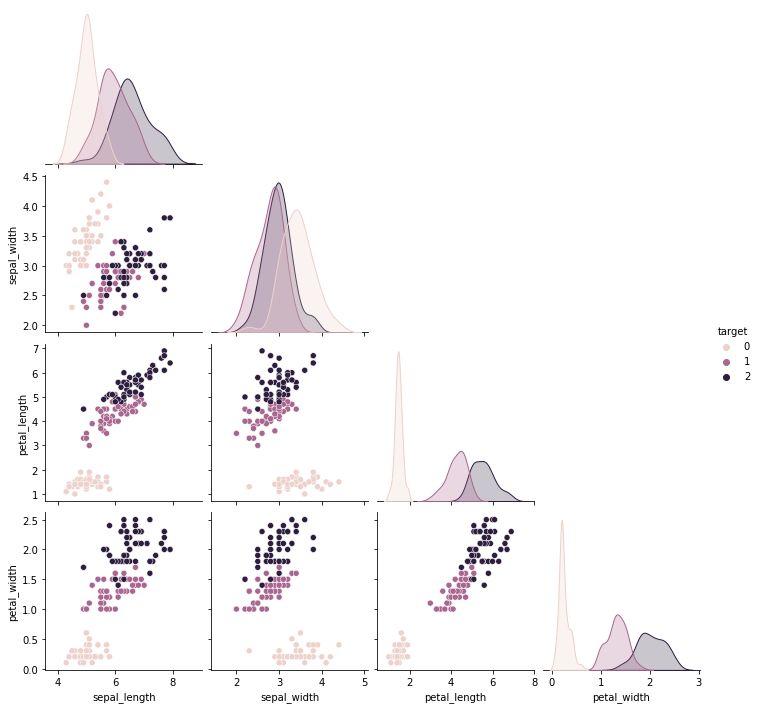

In [3]:
sns.pairplot(iris_df, hue='target', corner=True)
graph.show()

In [4]:
def euclidean_distance(instance_1, instance_2):
    distance = 0
    for i in range(len(instance_1) - 1):
        distance += (instance_1[i] - instance_2[i])**2
    return np.sqrt(distance)

In [5]:
def get_neighbours(data, instance, num_neighbours):
    distances = []
    for sample in data:
        dist = euclidean_distance(instance, sample)
        distances.append((sample, dist))
    distances.sort(key = lambda tup:tup[1])
    
    neighbours = []
    
    for i in range(num_neighbours):
        neighbours.append(distances[i][0])
    return neighbours

In [6]:
def predict_classification(data, instance, num_neighbours):
    neighbours = get_neighbours(data, instance, num_neighbours)
    output_values = [sample[-1] for sample in neighbours]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
 

In [7]:
def k_nearest_neighbors(data, instance, num_neighbours):
    predictions = []
    for sample in data:
        output = predict_classification(data, sample, num_neighbours)
        predictions.append(output)
    return(predictions)

In [8]:
k_nearest_neighbors(x_y, x_y[100], 3)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0]